In [ ]:
# Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Step 2: Load the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [ ]:
# Step 3: Preprocess the Data
# Normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape to fit CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


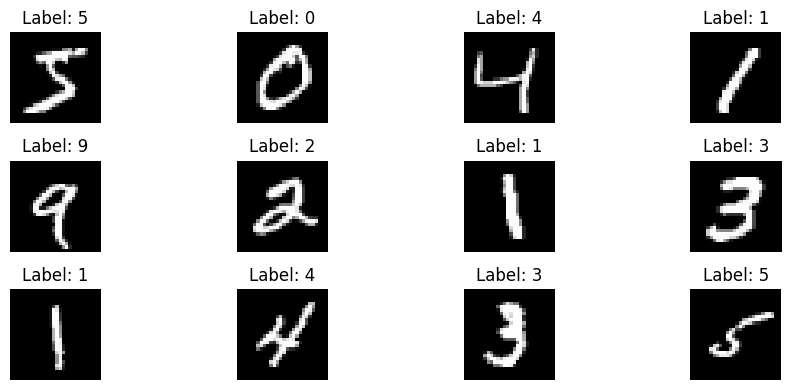

In [ ]:
# Step 4: Visualize the Data
plt.figure(figsize=(10, 4))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Step 5: Build the CNN Model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 6: Train the Model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - accuracy: 0.7662 - loss: 0.7251 - val_accuracy: 0.9744 - val_loss: 0.0835
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.9617 - loss: 0.1283 - val_accuracy: 0.9818 - val_loss: 0.0610
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.9719 - loss: 0.0927 - val_accuracy: 0.9847 - val_loss: 0.0497
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.9771 - loss: 0.0771 - val_accuracy: 0.9862 - val_loss: 0.0442
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.9813 - loss: 0.0600 - val_accuracy: 0.9879 - val_loss: 0.0402


In [ ]:
# Step 7: Evaluate on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9871 - loss: 0.0397
Test Accuracy: 98.94%


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


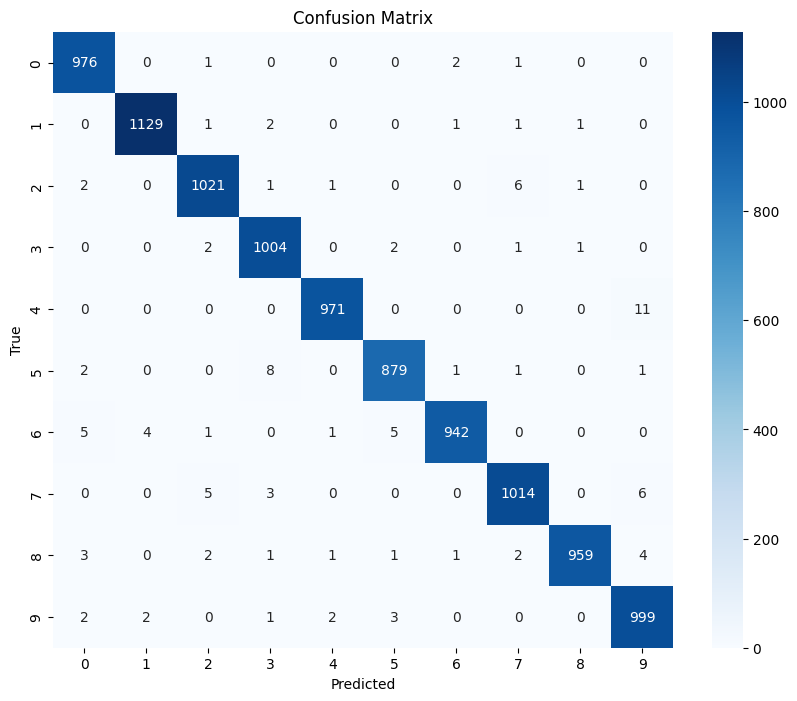

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Step 8: Confusion Matrix and Classification Report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


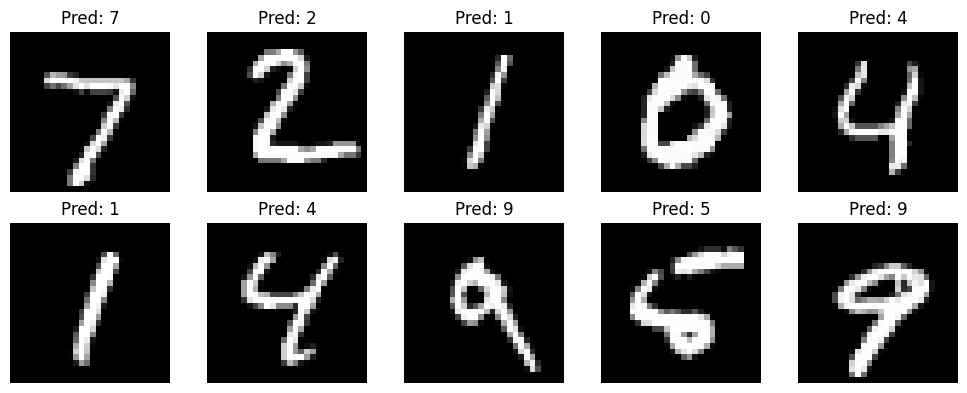

In [ ]:
# Step 9: Try Prediction on a Few Test Samples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = x_test[i]
    plt.imshow(img.reshape(28, 28), cmap='gray')
    pred = np.argmax(model.predict(img.reshape(1,28,28,1)))
    plt.title(f"Pred: {pred}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Step 10: Save the Model
model.save("mnist_cnn_model.h5")
print("Model saved as mnist_cnn_model.h5")


Model saved as mnist_cnn_model.h5


In [ ]:
from google.colab import files
files.download("mnist_cnn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>